In [44]:
import sqlite3
import pandas as pd
from pandas.api.types import CategoricalDtype
from prophet import Prophet

import get_stock_data as gsd
from datetime import date
from datetime import timedelta

import logging

logging.basicConfig(level=logging.INFO)





In [45]:
YEARS_OF_HISTORY_TO_CONSIDER = 3
TICKER = 'AAPL'

In [46]:
TODAY = date.today()
END_DATE = TODAY.strftime("%Y-%m-%d")
START_DATE = (TODAY - timedelta(days=YEARS_OF_HISTORY_TO_CONSIDER*365)).strftime("%Y-%m-%d")

logging.info(f"Start date: {START_DATE}")
logging.info(f"End date: {END_DATE}")


In [47]:




df = gsd.get_daily_stock_data(tickerSymbol=TICKER, start_date=START_DATE,end_date=END_DATE)
df = df[['Date', 'Close']]
df.set_index('Date', inplace=True)
df = df.reset_index()\
    .rename(columns={'Date': 'ds', 'Close': 'y'})
df


,ds,y
0,2021-05-18,122.751976
1,2021-05-19,122.594673
2,2021-05-20,125.170647
3,2021-05-21,123.322220
4,2021-05-24,124.964165
...,...,...
750,2024-05-10,183.050003
751,2024-05-13,186.279999
752,2024-05-14,187.429993
753,2024-05-15,189.720001


In [ ]:
model = Prophet()

In [ ]:
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /var/folders/bn/gpsh1csx5cn3n2b260wncbvm0000gn/T/tmpq3_rutc3/d5tqtq5p.json
DEBUG:cmdstanpy:input tempfile: /var/folders/bn/gpsh1csx5cn3n2b260wncbvm0000gn/T/tmpq3_rutc3/4mftg_07.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/Users/jjespinoza/Documents/repos/NewsWaveMetrics/.venv/lib/python3.12/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44436', 'data', 'file=/var/folders/bn/gpsh1csx5cn3n2b260wncbvm0000gn/T/tmpq3_rutc3/d5tqtq5p.json', 'init=/var/folders/bn/gpsh1csx5cn3n2b260wncbvm0000gn/T/tmpq3_rutc3/4mftg_07.json', 'output', 'file=/var/folders/bn/gpsh1csx5cn3n2b260wncbvm0000gn/T/tmpq3_rutc3/prophet_model3ynl9d7_/prophet_model-20240517142002.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:20:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:C

In [ ]:
model.predict(df)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,66.300769,62.143026,78.649295,66.300769,66.300769,4.258778,4.258778,4.258778,-1.292976,-1.292976,-1.292976,5.551754,5.551754,5.551754,0.0,0.0,0.0,70.559547
1,2020-01-03,66.410532,62.224280,78.447926,66.410532,66.410532,3.947540,3.947540,3.947540,-1.373226,-1.373226,-1.373226,5.320767,5.320767,5.320767,0.0,0.0,0.0,70.358073
2,2020-01-06,66.739821,61.866395,77.950760,66.739821,66.739821,3.606462,3.606462,3.606462,-1.097046,-1.097046,-1.097046,4.703508,4.703508,4.703508,0.0,0.0,0.0,70.346283
3,2020-01-07,66.849584,61.823579,77.947200,66.849584,66.849584,3.291772,3.291772,3.291772,-1.242368,-1.242368,-1.242368,4.534140,4.534140,4.534140,0.0,0.0,0.0,70.141356
4,2020-01-08,66.959347,62.326534,78.234085,66.959347,66.959347,3.201005,3.201005,3.201005,-1.187095,-1.187095,-1.187095,4.388100,4.388100,4.388100,0.0,0.0,0.0,70.160352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,2024-05-10,179.790323,165.290957,181.211922,179.790323,179.790323,-6.987425,-6.987425,-6.987425,-1.373226,-1.373226,-1.373226,-5.614199,-5.614199,-5.614199,0.0,0.0,0.0,172.802898
1097,2024-05-13,179.738706,164.465264,181.382611,179.738706,179.738706,-7.237066,-7.237066,-7.237066,-1.097046,-1.097046,-1.097046,-6.140020,-6.140020,-6.140020,0.0,0.0,0.0,172.501640
1098,2024-05-14,179.721500,164.148476,180.603013,179.721500,179.721500,-7.585232,-7.585232,-7.585232,-1.242368,-1.242368,-1.242368,-6.342864,-6.342864,-6.342864,0.0,0.0,0.0,172.136268
1099,2024-05-15,179.704294,164.038311,180.208422,179.704294,179.704294,-7.743719,-7.743719,-7.743719,-1.187095,-1.187095,-1.187095,-6.556624,-6.556624,-6.556624,0.0,0.0,0.0,171.960575


/Users/jjespinoza/Documents/repos/NewsWaveMetrics/.venv/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/jjespinoza/Documents/repos/NewsWaveMetrics/.venv/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


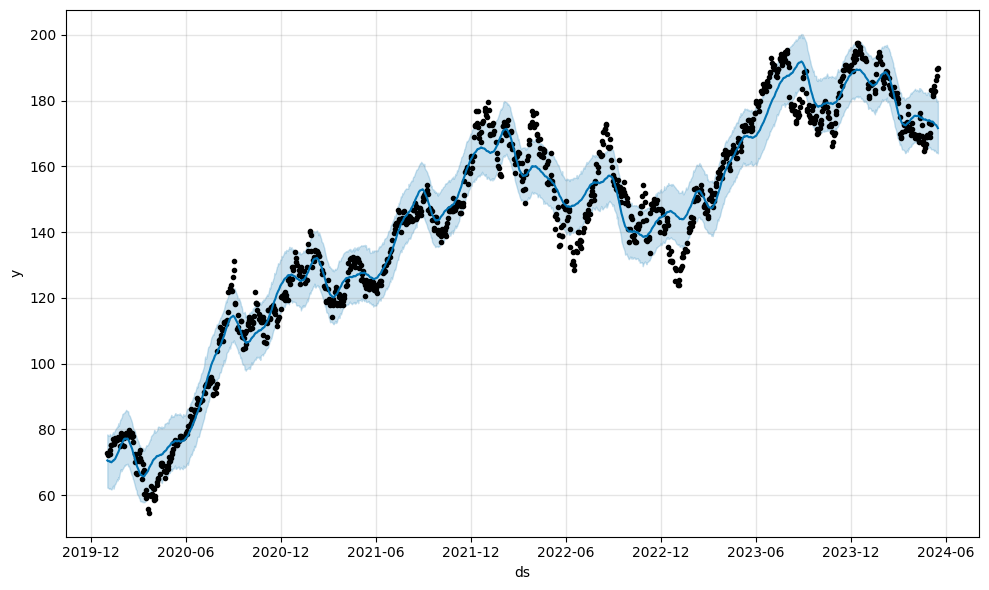

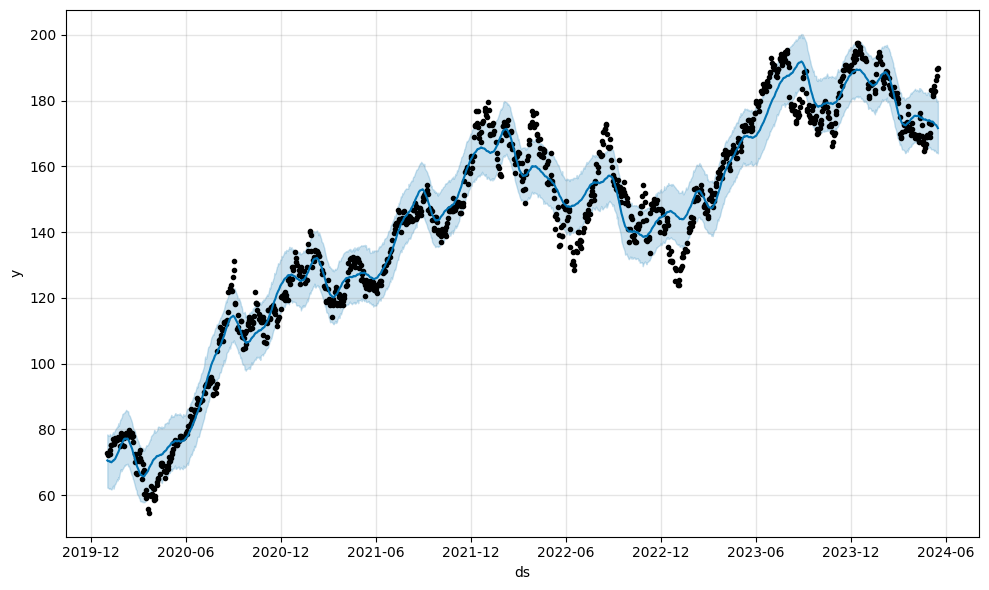

In [ ]:
model.plot(model.predict(df))

/Users/jjespinoza/Documents/repos/NewsWaveMetrics/.venv/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/jjespinoza/Documents/repos/NewsWaveMetrics/.venv/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/jjespinoza/Documents/repos/NewsWaveMetrics/.venv/lib/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future ve

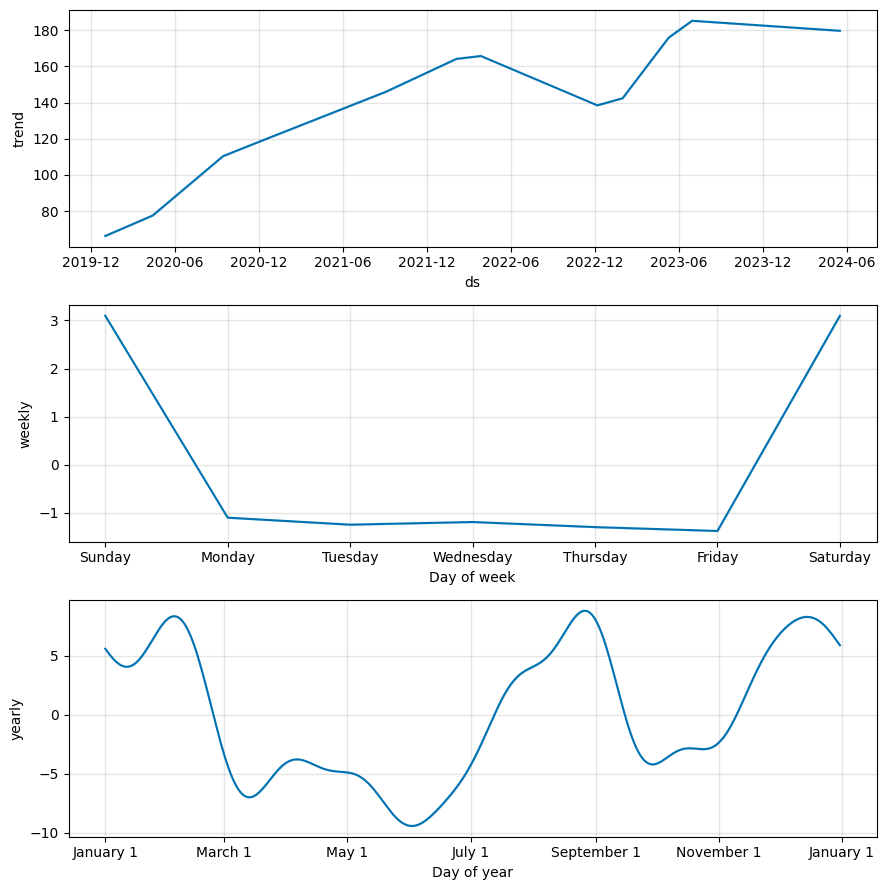

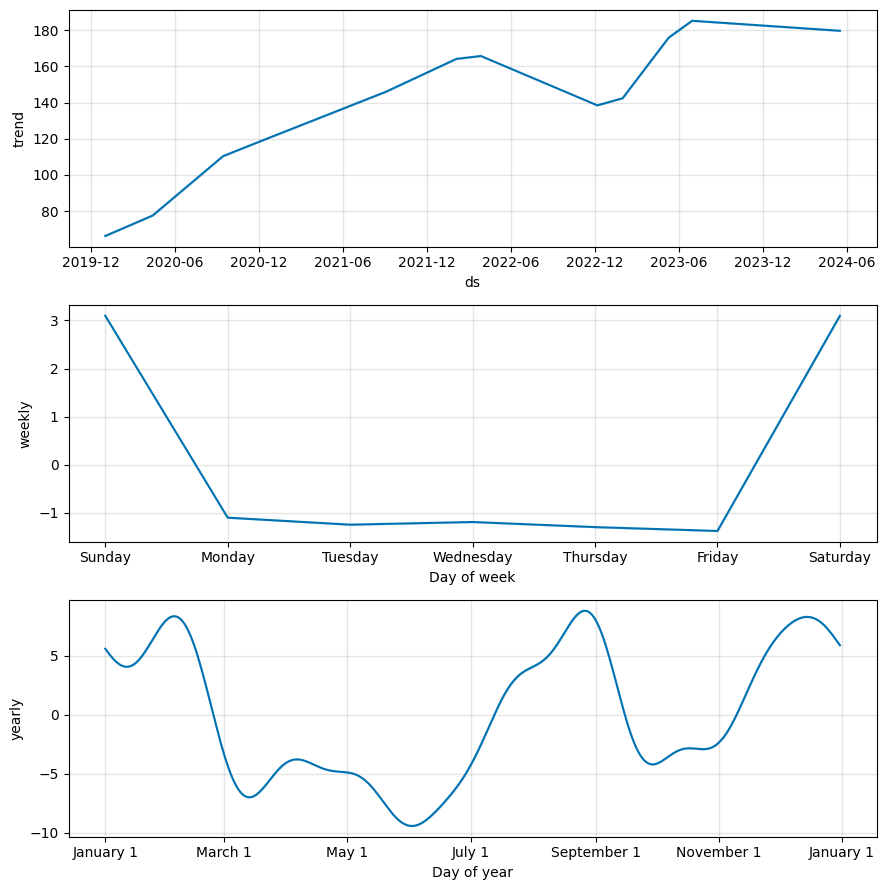

In [ ]:
model.plot_components(model.predict(df))

In [ ]:
# Create a future dataframe with n periods
future = model.make_future_dataframe(periods=14)

# Generate the forecast
forecast = model.predict(future)

# Print the forecasted values
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(14))

             ds        yhat  yhat_lower  yhat_upper
1101 2024-05-17  171.288813  162.786916  179.556615
1102 2024-05-18  175.508844  167.119208  183.708876
1103 2024-05-19  175.258492  166.753825  183.654784
1104 2024-05-20  170.816834  162.495988  179.563291
1105 2024-05-21  170.428266  162.776091  179.091122
1106 2024-05-22  170.248180  161.814652  178.661080
1107 2024-05-23  169.917603  161.495672  178.403815
1108 2024-05-24  169.625937  161.171810  177.594081
1109 2024-05-25  173.899786  165.638718  181.779120
1110 2024-05-26  173.721874  165.775911  182.595573
1111 2024-05-27  169.370225  160.677193  177.764428
1112 2024-05-28  169.087824  161.089674  177.479012
1113 2024-05-29  169.028330  160.519593  177.379456
1114 2024-05-30  168.830772  160.682465  176.446280
